In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [68]:
'''Position limits for the newly introduced products:

- `VOLCANIC_ROCK`: 400

`VOLCANIC_ROCK_VOUCHER_9500` :

- Position Limit: 200
- Strike Price: 9,500 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1

`VOLCANIC_ROCK_VOUCHER_9750` :

- Position Limit: 200
- Strike Price: 9,750 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1

`VOLCANIC_ROCK_VOUCHER_10000` :

- Position Limit: 200
- Strike Price: 10,000 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1

`VOLCANIC_ROCK_VOUCHER_10250` :

- Position Limit: 200
- Strike Price: 10,250 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1

`VOLCANIC_ROCK_VOUCHER_10500` :

- Position Limit: 200
- Strike Price: 10,500 SeaShells
- Expiration deadline: 7 days (1 round = 1 day) starting from round 1'''


class Product:
    ROCK = 'VOLCANIC_ROCK'
    VOUCHER_9500 = 'VOLCANIC_ROCK_VOUCHER_9500'
    VOUCHER_9750 = 'VOLCANIC_ROCK_VOUCHER_9750'
    VOUCHER_10000 = 'VOLCANIC_ROCK_VOUCHER_10000'
    VOUCHER_10250 = 'VOLCANIC_ROCK_VOUCHER_10250'
    VOUCHER_10500 = 'VOLCANIC_ROCK_VOUCHER_10500'

position_limits = {
    Product.ROCK: 400,
    Product.VOUCHER_9500: 200,
    Product.VOUCHER_9750: 200,
    Product.VOUCHER_10000: 200,
    Product.VOUCHER_10250: 200,
    Product.VOUCHER_10500: 200
}

In [69]:
prices = pd.concat([pd.read_csv(f'round3/prices_round_3_day_{i}.csv', sep=';') for i in range(3)], ignore_index=True)
trades = pd.concat([pd.read_csv(f'round3/trades_round_3_day_{i}_nn.csv', sep=';') for i in range(3)], ignore_index=True)

In [70]:
prices['swmid'] = (prices['bid_price_1'] * prices['ask_volume_1'] + prices['ask_price_1'] * prices['bid_volume_1']) / (prices['ask_volume_1'] + prices['bid_volume_1'])

In [71]:
rock = prices[prices["product"] == Product.ROCK].reset_index(drop=True).copy()
voucher_9500 = prices[prices["product"] == Product.VOUCHER_9500].reset_index(drop=True).copy()
voucher_9750 = prices[prices["product"] == Product.VOUCHER_9750].reset_index(drop=True).copy()
voucher_10000 = prices[prices["product"] == Product.VOUCHER_10000].reset_index(drop=True).copy()
voucher_10250 = prices[prices["product"] == Product.VOUCHER_10250].reset_index(drop=True).copy()
voucher_10500 = prices[prices["product"] == Product.VOUCHER_10500].reset_index(drop=True).copy()

In [72]:
[rock, voucher_9500, voucher_9750, voucher_10000, voucher_10250, voucher_10500] = [df.rename(columns={'ask_price_1': 'ask_price', 'bid_price_1': 'bid_price', 'ask_volume_1': 'ask_volume', 'bid_volume_1': 'bid_volume'}) for df in [rock, voucher_9500, voucher_9750, voucher_10000, voucher_10250, voucher_10500]]

In [73]:
rock = rock.drop(columns=['product'], axis=1).rename(columns={col: col + '_rock' for col in rock.columns if col not in ['timestamp', 'day']})
voucher_9500 = voucher_9500.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher9500' for col in voucher_9500.columns if col not in ['timestamp', 'day']})
voucher_9750 = voucher_9750.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher9750' for col in voucher_9750.columns if col not in ['timestamp', 'day']})
voucher_10000 = voucher_10000.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher10000' for col in voucher_10000.columns if col not in ['timestamp', 'day']})
voucher_10250 = voucher_10250.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher10250' for col in voucher_10250.columns if col not in ['timestamp', 'day']})
voucher_10500 = voucher_10500.drop(columns=['product'], axis=1).rename(columns={col: col + '_voucher10500' for col in voucher_10500.columns if col not in ['timestamp', 'day']})

In [74]:
# join croissants, james, djembes, basket1, basket2 on timestamp
mk = rock.merge(voucher_9500, on=['day', 'timestamp'])
mk = mk.merge(voucher_9750, on=['day', 'timestamp'])
mk = mk.merge(voucher_10000, on=['day', 'timestamp'])
mk = mk.merge(voucher_10250, on=['day', 'timestamp'])
mk = mk.merge(voucher_10500, on=['day', 'timestamp'])
mk

,day,timestamp,bid_price_rock,bid_volume_rock,bid_price_2_rock,bid_volume_2_rock,bid_price_3_rock,bid_volume_3_rock,ask_price_rock,ask_volume_rock,...,bid_volume_3_voucher10500,ask_price_voucher10500,ask_volume_voucher10500,ask_price_2_voucher10500,ask_volume_2_voucher10500,ask_price_3_voucher10500,ask_volume_3_voucher10500,mid_price_voucher10500,profit_and_loss_voucher10500,swmid_voucher10500
0,0,0,10502.0,205.0,NaN,NaN,NaN,NaN,10504,146,...,NaN,100,19,NaN,NaN,NaN,NaN,99.5,0.0,99.5
1,0,100,10509.0,192.0,NaN,NaN,NaN,NaN,10511,122,...,NaN,103,13,NaN,NaN,NaN,NaN,102.5,0.0,102.5
2,0,200,10512.0,167.0,NaN,NaN,NaN,NaN,10514,109,...,NaN,105,15,NaN,NaN,NaN,NaN,104.5,0.0,104.5
3,0,300,10517.0,118.0,10516.0,68.0,NaN,NaN,10518,118,...,NaN,107,13,NaN,NaN,NaN,NaN,106.5,0.0,106.5
4,0,400,10509.0,128.0,10508.0,73.0,NaN,NaN,10510,128,...,NaN,103,15,NaN,NaN,NaN,NaN,102.5,0.0,102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2,999500,10167.0,110.0,10166.0,51.0,NaN,NaN,10169,156,...,NaN,4,20,NaN,NaN,NaN,NaN,3.5,0.0,3.2
29996,2,999600,10166.0,161.0,NaN,NaN,NaN,NaN,10168,101,...,NaN,4,14,NaN,NaN,NaN,NaN,3.5,0.0,3.5
29997,2,999700,10166.0,143.0,10165.0,51.0,NaN,NaN,10168,194,...,NaN,4,13,NaN,NaN,NaN,NaN,3.5,0.0,3.5
29998,2,999800,10167.0,119.0,10166.0,57.0,NaN,NaN,10168,119,...,NaN,4,20,NaN,NaN,NaN,NaN,3.5,0.0,3.5


In [75]:
from scipy.stats import norm

def realized_vol(df, window, step_size):
    df[f'log_return_{step_size}'] = np.log(df['mid_price_rock'].to_numpy()/df['mid_price_rock'].shift(step_size).to_numpy())
    dt = step_size / 250 / 10000 
    df[f'realized_vol_{step_size}'] = df[f'log_return_{step_size}'].rolling(window=window).apply(lambda x: np.mean(x[::step_size]**2) / dt)
    df[f'realized_vol_{step_size}'] = np.sqrt(df[f'realized_vol_{step_size}'].to_numpy())
    return df

def black_scholes_call(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot / strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    call_price = (spot * norm.cdf(d1) - strike * norm.cdf(d2))
    return call_price

In [76]:
from scipy.optimize import brentq

def implied_volatility_neg(call_price, spot, strike, time_to_expiry):
    # Define the equation where the root is the implied volatility
    def equation(volatility):
        estimated_price = black_scholes_call(spot, strike, time_to_expiry, volatility)
        return estimated_price - call_price

    # Using Brent's method to find the root of the equation
    implied_vol = brentq(equation, -2.0, 3.0, xtol=1e-10)
    return implied_vol

def implied_volatility(call_price, spot, strike, time_to_expiry):
    # Define the equation where the root is the implied volatility
    def equation(volatility):
        estimated_price = black_scholes_call(spot, strike, time_to_expiry, volatility)
        return estimated_price - call_price

    # Using Brent's method to find the root of the equation
    implied_vol = brentq(equation, 1e-10, 3.0, xtol=1e-10)
    return implied_vol

In [77]:
def delta(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.cdf(d1)



In [78]:
strike = 10_000

mk['tte'] = (8 - mk['day'] - mk['timestamp'] / 1_000_000) / 250
mk['iv'] = mk.apply(lambda row: implied_volatility(row[f'mid_price_voucher{strike}'], row['mid_price_rock'], strike, row['tte']), axis=1)
mk['m_t'] = np.log(strike / mk['mid_price_rock']) / mk['tte']

In [79]:
mk[['mid_price_voucher9500', 'mid_price_rock', 'tte']]

,mid_price_voucher9500,mid_price_rock,tte
0,1003.5,10503.0,0.032000
1,1010.5,10510.0,0.032000
2,1013.5,10513.0,0.031999
3,1018.0,10517.5,0.031999
4,1010.0,10509.5,0.031998
...,...,...,...
29995,668.0,10168.0,0.020002
29996,667.5,10167.0,0.020002
29997,667.5,10167.0,0.020001
29998,667.5,10167.5,0.020001


In [80]:
strike = 10_000

for strike in [9500, 9750, 10000, 10250, 10500]:
    mk[f'iv_{strike}'] = mk.apply(lambda row: implied_volatility_neg(row[f'mid_price_voucher{strike}'], row['mid_price_rock'], strike, row['tte']), axis=1)
    mk[f'm_{strike}'] = np.log(strike / mk['mid_price_rock']) / mk['tte']

In [81]:
# concat m_t and iv for all strikes rows
all_strikes = []
for strike in [10000, 10250, 10500]:
    all_strikes.append(mk[[f'm_{strike}', f'iv_{strike}', 'tte']].rename(columns={f'm_{strike}': 'm_t', f'iv_{strike}': 'iv'}))
all_strikes = pd.concat(all_strikes, ignore_index=True)

In [82]:
# fit curve predicting iv from m_t with quadratic regression
model = np.polyfit(all_strikes['m_t'], all_strikes['iv'], 2)
pred_iv = np.polyval(model, all_strikes['m_t'])

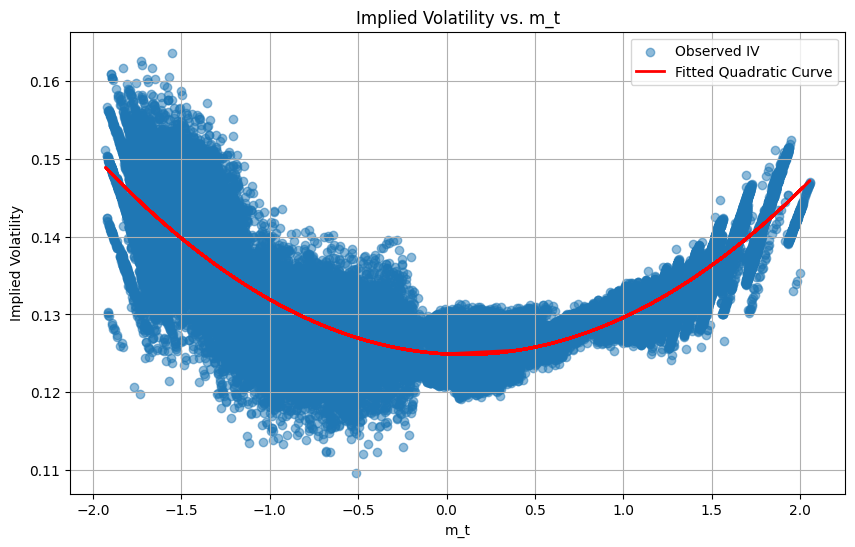

In [83]:
# plot predicted iv against m_t
plt.figure(figsize=(10, 6))
plt.scatter(all_strikes['m_t'], all_strikes['iv'], label='Observed IV', alpha=0.5)
plt.plot(all_strikes['m_t'], pred_iv, color='red', label='Fitted Quadratic Curve', linewidth=2)
plt.title('Implied Volatility vs. m_t')
plt.xlabel('m_t')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid()
plt.show()

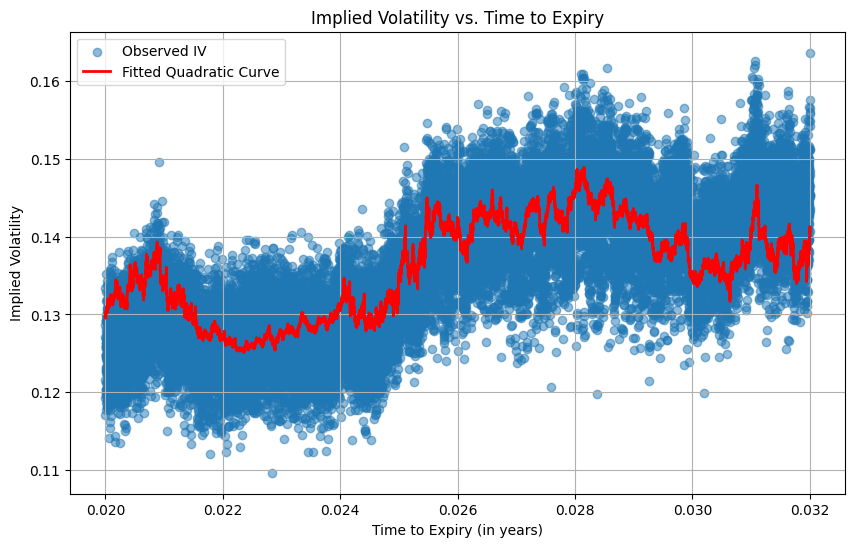

In [85]:
pred_iv = np.polyval(model, mk['m_10000'])
# plot predicted iv against tte
plt.figure(figsize=(10, 6))
plt.scatter(mk['tte'], mk['iv_10000'], label='Observed IV', alpha=0.5)
plt.plot(mk['tte'], pred_iv, color='red', label='Fitted Quadratic Curve', linewidth=2)
plt.title('Implied Volatility vs. Time to Expiry')
plt.xlabel('Time to Expiry (in years)')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid()
plt.show()

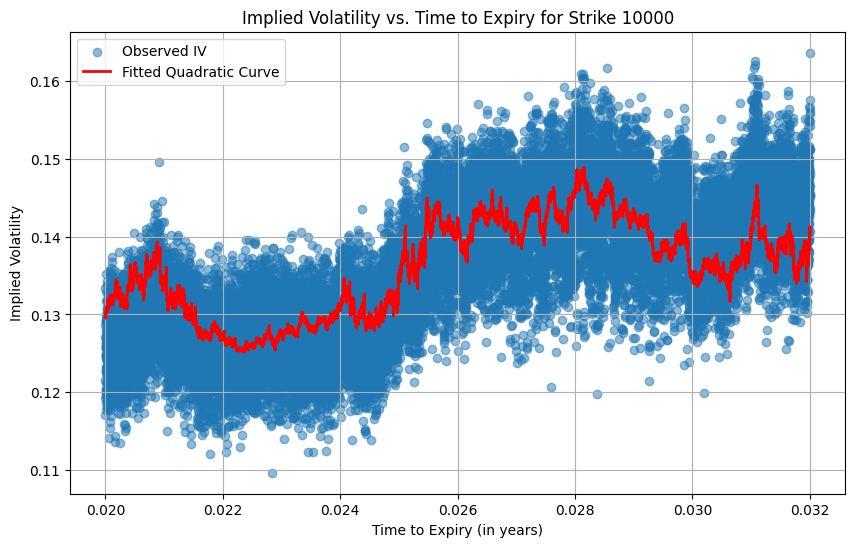

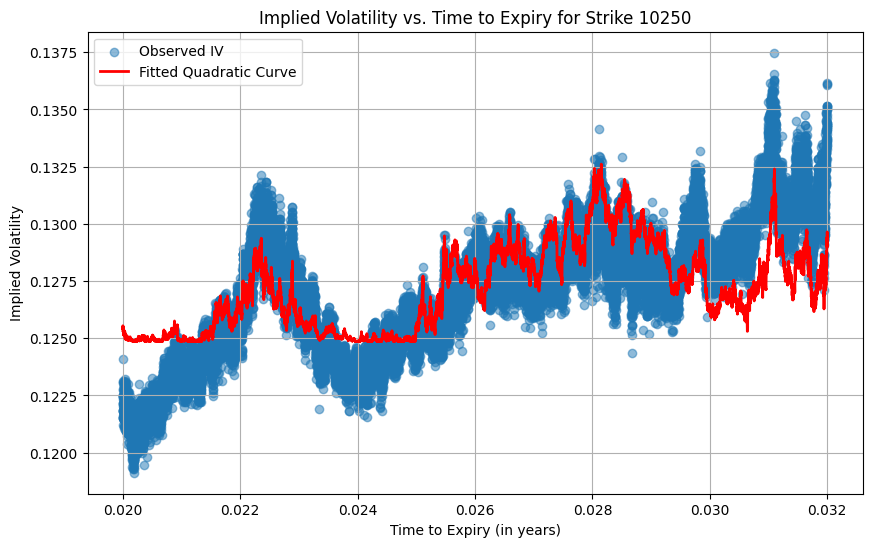

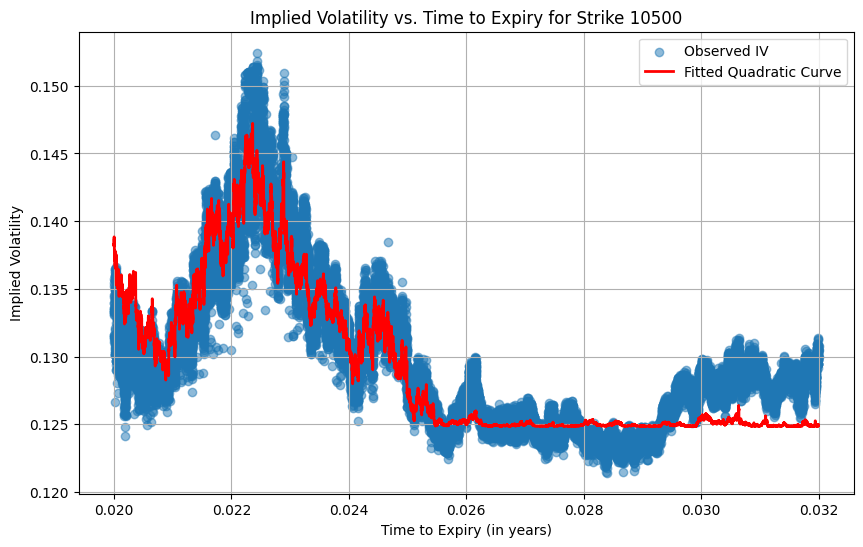

In [87]:
for strike in [10000, 10250, 10500]:
    mk[f'iv_{strike}_pred'] = np.polyval(model, mk[f'm_{strike}'])
    # plot predicted iv against tte for each strike
    plt.figure(figsize=(10, 6))
    plt.scatter(mk['tte'], mk[f'iv_{strike}'], label='Observed IV', alpha=0.5)
    plt.plot(mk['tte'], mk[f'iv_{strike}_pred'], color='red', label='Fitted Quadratic Curve', linewidth=2)
    plt.title(f'Implied Volatility vs. Time to Expiry for Strike {strike}')
    plt.xlabel('Time to Expiry (in years)')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid()
    plt.show()

In [89]:
# print model as equation
print(f"Model: iv = {model[0]:.6f} * m_t^2 + {model[1]:.6f} * m_t + {model[2]:.6f}")

Model: iv = 0.005847 * m_t^2 + -0.001162 * m_t + 0.124922


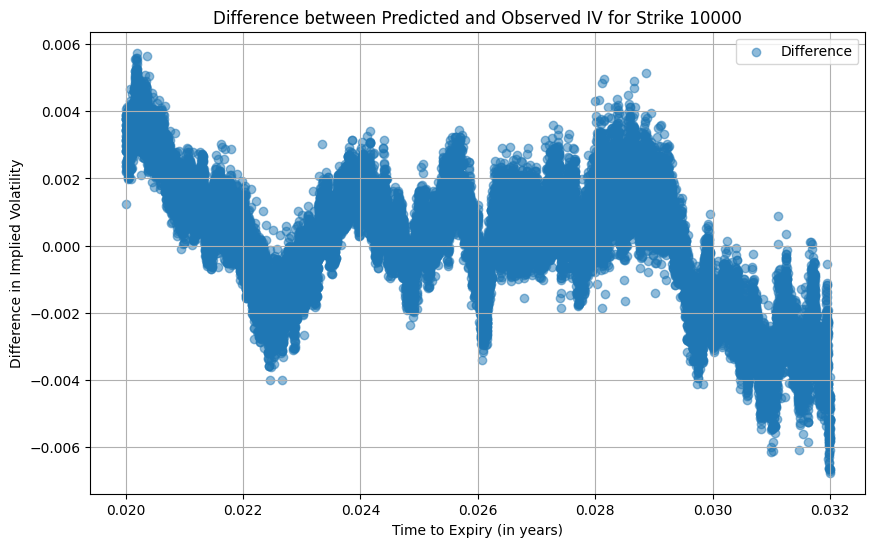

In [113]:
mk['iv_10000_pred'] - mk['iv_10000']  # difference between predicted and observed IV for strike 10000
# plot against tte
plt.figure(figsize=(10, 6))
plt.scatter(mk['tte'], mk['iv_10250_pred'] - mk['iv_10250'], label='Difference', alpha=0.5)
plt.title('Difference between Predicted and Observed IV for Strike 10000')
plt.xlabel('Time to Expiry (in years)')
plt.ylabel('Difference in Implied Volatility')
plt.legend()
plt.grid()
plt.show()

In [115]:
for strike in [10000, 10250, 10500]:
    # descriptives of the difference between predicted and observed IV
    diff = mk[f'iv_{strike}_pred'] - mk[f'iv_{strike}']
    print(f"Strike {strike} - Mean Difference: {diff.mean():.6f}, Std Dev: {diff.std():.6f}, Min: {diff.min():.6f}, Max: {diff.max():.6f}")

Strike 10000 - Mean Difference: 0.000308, Std Dev: 0.005438, Min: -0.022797, Max: 0.024732
Strike 10250 - Mean Difference: 0.000088, Std Dev: 0.001925, Min: -0.006760, Max: 0.005741
Strike 10500 - Mean Difference: -0.000395, Std Dev: 0.002334, Min: -0.008265, Max: 0.012089


ValueError: x and y must have same first dimension, but have shapes (90000,) and (30000,)

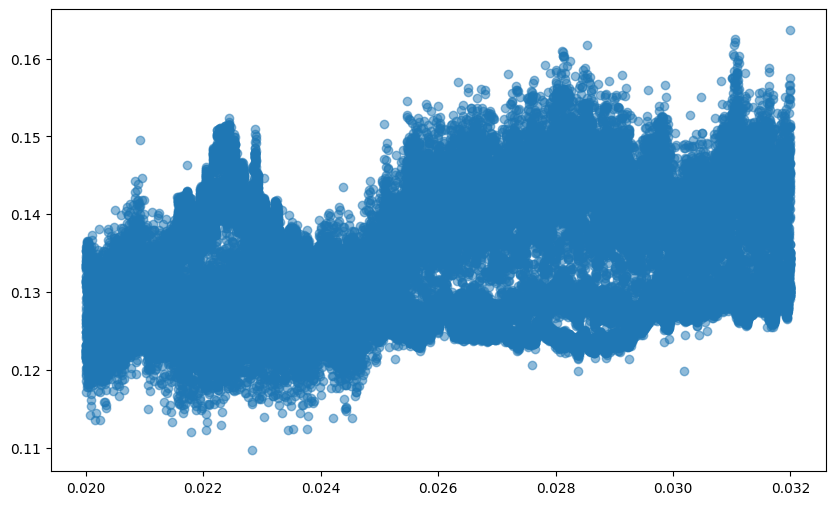

In [90]:
# plot predicted iv against tte
plt.figure(figsize=(10, 6))
plt.scatter(all_strikes['tte'], all_strikes['iv'], label='Observed IV', alpha=0.5)
plt.plot(all_strikes['tte'], pred_iv, color='red', label='Fitted Quadratic Curve', linewidth=2)
plt.title('Implied Volatility vs. Time to Expiry (tte)')
plt.xlabel('Time to Expiry (tte)')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid()
plt.show()

In [101]:
import statsmodels.api as sm

# Prepare the data
X = pd.DataFrame({
    'm_t': all_strikes['m_t'],
    'm_t_squared': all_strikes['m_t']**2,
    'tte': all_strikes['tte']
})

# Add constant for intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(all_strikes['iv'], X).fit()

# Print results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iv   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                 1.234e+05
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        05:40:18   Log-Likelihood:             3.9014e+05
No. Observations:               90000   AIC:                        -7.803e+05
Df Residuals:                   89996   BIC:                        -7.802e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1105      9e-05   1228.084      

iv_10000 = -1.5489993338884893 * tte + 0.15790752250797407

In [ ]:
'''
const          0.110515
m_t           -0.000239
m_t_squared    0.006106
tte            0.553659
'''
model.params


const          0.110515
m_t           -0.000239
m_t_squared    0.006106
tte            0.553659
dtype: float64

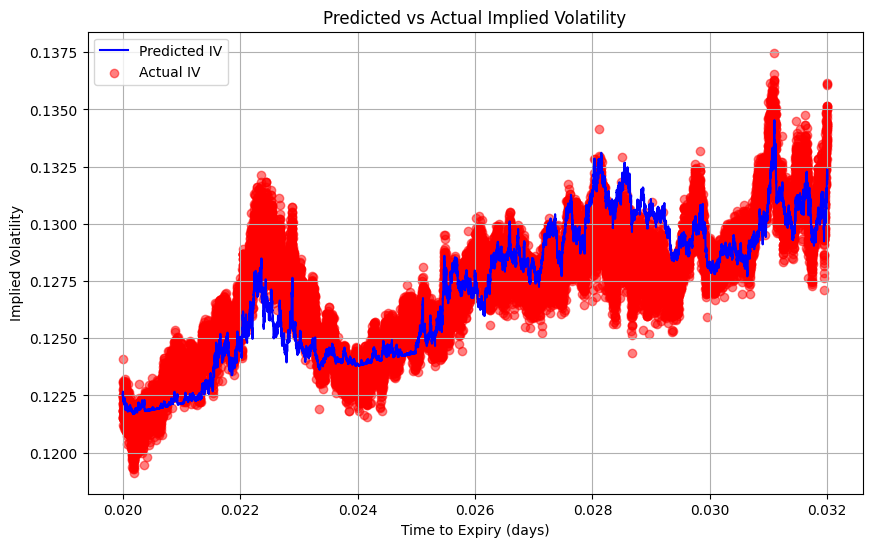

In [109]:
strike = 10250

mk[f'm_{strike}_squared'] = mk[f'm_{strike}'] ** 2

pred_iv = model.predict(sm.add_constant(mk[[f'm_{strike}', f'm_{strike}_squared', 'tte']]))
# plot pred iv against tte
plt.figure(figsize=(10, 6))
plt.plot(mk['tte'], pred_iv, label='Predicted IV', color='blue')
plt.scatter(mk['tte'], mk[f'iv_{strike}'], label='Actual IV', color='red', alpha=0.5)
plt.title('Predicted vs Actual Implied Volatility')
plt.xlabel('Time to Expiry (days)')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid()
plt.show()


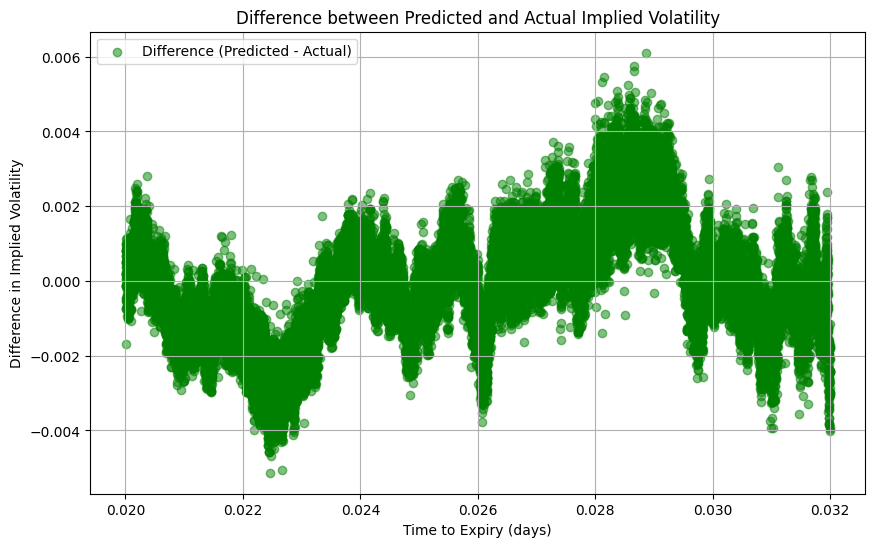

In [110]:
# plot pred iv - actual iv against tte
plt.figure(figsize=(10, 6))
plt.scatter(mk['tte'], pred_iv - mk[f'iv_{strike}'], label='Difference (Predicted - Actual)', color='green', alpha=0.5)
plt.title('Difference between Predicted and Actual Implied Volatility')
plt.xlabel('Time to Expiry (days)')
plt.ylabel('Difference in Implied Volatility')
plt.legend()
plt.grid()
plt.show()

In [21]:
'''
const          0.111995
m_t           -0.002378
m_t_squared    0.006545
tte            0.285533
'''


'\nconst          0.111995\nm_t           -0.002378\nm_t_squared    0.006545\ntte            0.285533\n'

In [22]:
'''
t: Timestamp
St: Voucher Underlying Price at t
K: Strike
TTE: Remaining Time till expiry at t
Vt: Voucher price of strike K at t

Compute,

m_t = log(K/St)/ sqrt(TTE)
v_t = BlackScholes ImpliedVol(St, Vt, K, TTE)

for each t, plot v_t vs m_t and fit a parabolic curve to filter random noise.

This fitted v_t(m_t) allows me to evaluate opportunities between different strikes. I also call fitted v_t(m_t=0) the base IV and I have identified interesting patterns in timeseries of base IV.
'''

'\nt: Timestamp\nSt: Voucher Underlying Price at t\nK: Strike\nTTE: Remaining Time till expiry at t\nVt: Voucher price of strike K at t\n\nCompute,\n\nm_t = log(K/St)/ sqrt(TTE)\nv_t = BlackScholes ImpliedVol(St, Vt, K, TTE)\n\nfor each t, plot v_t vs m_t and fit a parabolic curve to filter random noise.\n\nThis fitted v_t(m_t) allows me to evaluate opportunities between different strikes. I also call fitted v_t(m_t=0) the base IV and I have identified interesting patterns in timeseries of base IV.\n'